In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
events = pd.read_csv("events.csv")
items = pd.read_csv("item_features.csv")
users = pd.read_csv("user_features.csv")

In [3]:
df = pd.merge(pd.merge(events, items, on='item_id', how='inner'), users, on='user_id', how='inner')

In [4]:
df

,user_id,item_id,rating,timestamp,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,...,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,gender,age
0,0,1505,4,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,M,35
1,0,3669,3,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,M,35
2,0,584,4,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,M,35
3,0,3390,3,3,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,M,35
4,0,2885,4,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,M,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894144,6039,1453,4,223,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,35
894145,6039,613,5,224,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,M,35
894146,6039,1548,4,225,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,M,35
894147,6039,241,4,226,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,M,35


In [5]:
def accumulate(s):
    out = [[]]
    for x in s:
        out.append(out[-1]+[x])
    return out[:-1]


df = df.sort_values(by=['user_id', 'timestamp'])
df['cumulative_items'] = df.groupby('user_id')['item_id'].transform(accumulate)

In [6]:
df

,user_id,item_id,rating,timestamp,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,...,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,gender,age,cumulative_items
0,0,1505,4,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,M,35,[]
1,0,3669,3,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,M,35,[1505]
2,0,584,4,2,1,1,0,0,0,0,...,0,0,0,1,0,0,0,M,35,"[1505, 3669]"
3,0,3390,3,3,0,0,0,0,1,1,...,0,0,0,0,0,0,0,M,35,"[1505, 3669, 584]"
4,0,2885,4,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,M,35,"[1505, 3669, 584, 3390]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894144,6039,1453,4,223,0,0,0,0,0,0,...,0,0,0,0,0,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337..."
894145,6039,613,5,224,0,0,0,0,1,0,...,0,0,1,0,0,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337..."
894146,6039,1548,4,225,1,0,0,0,0,1,...,0,0,0,0,1,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337..."
894147,6039,241,4,226,0,0,0,0,0,0,...,0,1,0,0,0,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337..."


In [7]:
df["len_history"] = df["cumulative_items"].apply(lambda x: len(x))

Посмотрим на кол-во айтемов в истории у юзеров.

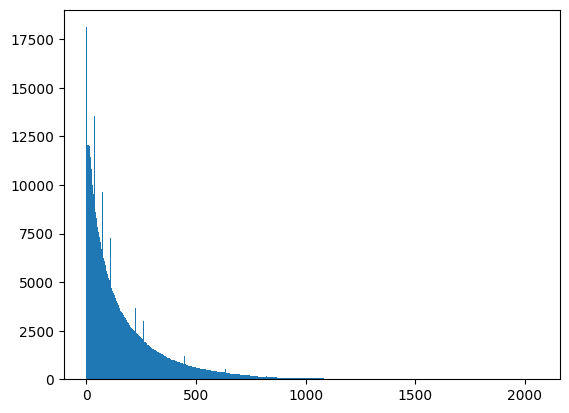

In [8]:
plt.hist(df["len_history"], bins=1000)
plt.show()

Теперь посмотрим на финальное кол-во айтемов в истории у юзеров.

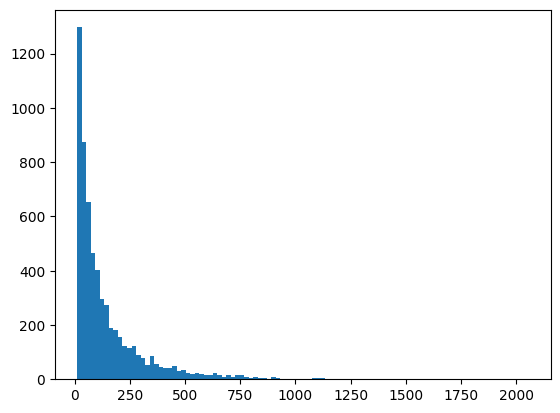

In [9]:
max_items = df.groupby('user_id')['len_history'].max().reset_index()

plt.hist(max_items["len_history"], bins=100,)
plt.show()

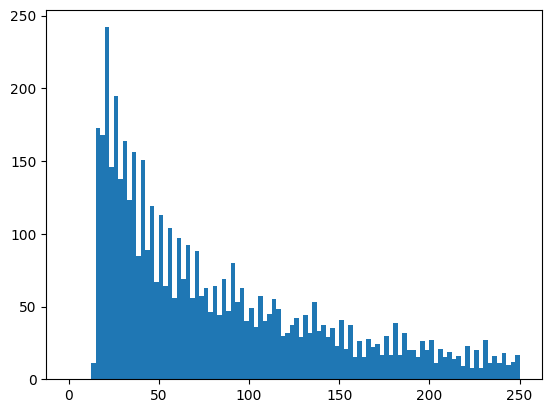

In [10]:
max_items = df.groupby('user_id')['len_history'].max().reset_index()

plt.hist(max_items["len_history"], bins=100, range=[0, 250])
plt.show()

Зададим максимальную длину последовательности (SEQ_LEN), и в итоге получим итоговую длину последовательности (TOTAL_LEN = SEQ_LEN + 1; +1 - это маска для BERT для предикта следующего айтема), а также выбросим сэмплы, где в истории меньше чем COLD_LEN айтемов.

In [11]:
SEQ_LEN = 29
TOTAL_LEN = 30
COLD_LEN = 3

PAD_IND = max(items["item_id"].tolist()) + 1
MASK_IND = max(items["item_id"].tolist()) + 2


def preprocess_items_history(items):
  N = len(items)

  if N < COLD_LEN:
    return None

  if N < SEQ_LEN:
    return [PAD_IND] * (SEQ_LEN - N) + items + [MASK_IND]
  else:
    return items[-SEQ_LEN:] + [MASK_IND]


def attention_mask(items):
  N = len(items)

  if N < COLD_LEN:
    return None

  if N < SEQ_LEN:
    return [0] * (SEQ_LEN - N) + [1] * (N + 1)
  else:
    return [1] * (SEQ_LEN + 1)


df["history"] = df["cumulative_items"].apply(lambda x: preprocess_items_history(x))

In [12]:
df["attention_mask"] = df["cumulative_items"].apply(lambda x: attention_mask(x))

In [13]:
df

,user_id,item_id,rating,timestamp,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,...,genre_14,genre_15,genre_16,genre_17,gender,age,cumulative_items,len_history,history,attention_mask
0,0,1505,4,0,1,0,0,0,0,1,...,0,0,0,0,M,35,[],0,None,None
1,0,3669,3,1,0,0,0,0,1,0,...,0,0,0,0,M,35,[1505],1,None,None
2,0,584,4,2,1,1,0,0,0,0,...,1,0,0,0,M,35,"[1505, 3669]",2,None,None
3,0,3390,3,3,0,0,0,0,1,1,...,0,0,0,0,M,35,"[1505, 3669, 584]",3,"[3706, 3706, 3706, 3706, 3706, 3706, 3706, 370...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,2885,4,4,1,0,0,0,0,1,...,0,0,0,0,M,35,"[1505, 3669, 584, 3390]",4,"[3706, 3706, 3706, 3706, 3706, 3706, 3706, 370...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894144,6039,1453,4,223,0,0,0,0,0,0,...,0,0,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337...",197,"[779, 1511, 3423, 1354, 2384, 2798, 2509, 3269...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
894145,6039,613,5,224,0,0,0,0,1,0,...,0,0,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337...",198,"[1511, 3423, 1354, 2384, 2798, 2509, 3269, 223...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
894146,6039,1548,4,225,1,0,0,0,0,1,...,0,1,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337...",199,"[3423, 1354, 2384, 2798, 2509, 3269, 2230, 351...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
894147,6039,241,4,226,0,0,0,0,0,0,...,0,0,0,0,M,35,"[610, 2096, 1174, 1931, 3424, 1775, 1086, 1337...",200,"[1354, 2384, 2798, 2509, 3269, 2230, 3516, 256...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [14]:
df = df.dropna(subset=['history'])

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import recall_score

Зафиксируем сиды.

In [16]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

Некоторые функции взяты из семинаров/дз по курсу NLP, поэтому могут быть пересечения.

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


def to_tensors(batch, device):
    batch_tensors = dict()
    for key, arr in batch.items():
        if key in ["user_id", "item_id", "history", "attention_mask"]:
          batch_tensors[key] = torch.tensor(list(arr), device=device, dtype=torch.int64)
    return batch_tensors


def make_batch(data, max_len=None, word_dropout=0, device=device):
    batch = {}
    batch["history"] = data["history"]
    batch["attention_mask"] = data["attention_mask"]

    if "item_id" in data.columns:
        batch["item_id"] = data["item_id"]

    return to_tensors(batch, device)

In [18]:
make_batch(df[:3])

{'history': tensor([[3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706,
          3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706,
          3706, 3706, 1505, 3669,  584, 3707],
         [3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706,
          3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706,
          3706, 1505, 3669,  584, 3390, 3707],
         [3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706,
          3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706,
          1505, 3669,  584, 3390, 2885, 3707]], device='cuda:0'),
 'attention_mask': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1,

In [19]:
TOKENS = list(set(items["item_id"].tolist())) + [PAD_IND, MASK_IND]

In [20]:
class Bert4Rec(nn.Module):
    def __init__(self, input_dim, num_heads, num_layers, num_classes, max_len, d_model):
        super(Bert4Rec, self).__init__()

        self.emb_item = nn.Embedding(input_dim + 1, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_len, d_model))

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=num_heads,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.out_layers = nn.Sequential(
            nn.Linear(d_model, d_model * 10),
            nn.ReLU(),
            nn.Linear(d_model * 10, num_classes)
        )

    def forward(self, batch):
        embedded = self.emb_item(batch["history"]) + self.positional_encoding[:, :batch["history"].size(1), :]

        transformer_output = self.transformer_encoder(embedded, src_key_padding_mask=torch.logical_not(batch["attention_mask"].bool()))

        mask_output = transformer_output[:, -1, :]

        output = self.out_layers(mask_output)
        return output

In [21]:
def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, device=device, **kwargs):
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]], device=device, **kwargs)
            yield batch

        if not cycle: break

In [22]:
from tqdm.auto import tqdm
from IPython.display import clear_output

BATCH_SIZE = 32
EPOCHS = 100

In [23]:
last_idx = df.groupby('user_id')['timestamp'].idxmax()

train = df.loc[~df.index.isin(last_idx)]
valid = df.loc[last_idx]

In [24]:
len(df) // BATCH_SIZE

27375

Непосредственно обучаем модель. Для воспроизведения спускаемся ниже для скачивания уже готовой обученной модели, чтобы заново не ждать час для обучения.

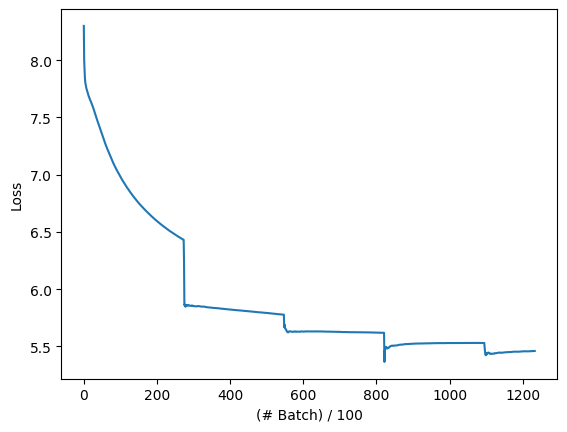

KeyboardInterrupt: 

In [ ]:
model = Bert4Rec(
    input_dim=len(TOKENS),
    num_heads=8,
    num_layers=6,
    num_classes=len(TOKENS) - 2,
    max_len=TOTAL_LEN,
    d_model=128
).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

train_losses = []
recall_arr = []

for epoch in range(EPOCHS):
    print(f"epoch: {epoch}")
    tmp_loss = 0
    model.train()
    for i, batch in tqdm(enumerate(
            iterate_minibatches(df, batch_size=BATCH_SIZE, device=device)),
            total=len(df) // BATCH_SIZE
        ):


        pred = model(batch)
        loss = criterion(pred, batch["item_id"])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tmp_loss += loss.item()

        if i % 100 == 0: # на каждом сотом батче будем выводить среднюю ошибку на эпохе
          train_losses.append(tmp_loss / (i + 1))

          clear_output(wait=True)

          plt.plot(train_losses, label='Training Loss')
          plt.xlabel('(# Batch) / 100')
          plt.ylabel('Loss')
          plt.show()

Скачки показывают начало новой эпохи, вызваны тем, что лосс считаю средний по эпохе, и поэтому в начале новой эпохе лосс как бы начинает считаться заново. Видим тут, что обучили 4 полные эпохи и частично 5ю.

Сохраним модель для воспроизведения результатов.

In [ ]:
torch.save(model, 'model.pth')

Теперь обратно загрузим модель, чтобы заново не обучать ее + чтобы было удобно воспроизвести.

In [25]:
model = torch.load('model.pth')
model.eval()

<ipython-input-25-50ead1647aac>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('model.pth')


Bert4Rec(
  (emb_item): Embedding(3709, 128)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (emb_user): Embedding(1, 128)
  (out_layers): Sequential(
    (0): Linear(in_features=128, out_features=1280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1280, out_features=3706, bias=True)
  )
)

Сохраним все айтемы, что видел юзер, в список для нескольких целей:
1. На этом датафрейме будем предиктить следующие айтемы для сабмита (в текущем df, который использовался для трейна, в списке не будет самого последнего айтема).
2. При ранжировании предсказаний для юзеров для сабмита будем выкидывать те айтемы, с кем юзер уже провзаимодействовал.

In [26]:
seen_items = events.groupby('user_id').agg({'item_id': list})

In [27]:
seen_items

,item_id
user_id,
0,"[1505, 3669, 584, 3390, 2885, 79, 717, 187, 93..."
1,"[476, 738, 488, 702, 378, 174, 2653, 2688, 640..."
2,"[2916, 1811, 3408, 36, 3311, 802, 1337, 2653, ..."
3,"[1583, 99, 318, 1592, 3066, 472, 452, 3311, 10..."
4,"[2980, 2387, 36, 110, 2643, 2414, 2190, 711, 2..."
...,...
6035,"[1732, 1665, 1379, 1568, 3022, 2688, 292, 1831..."
6036,"[1956, 3338, 3159, 418, 3335, 2784, 3423, 3072..."
6037,"[2862, 3593, 3692, 387, 1548, 2789, 138, 293, ..."


In [28]:
seen_items["history"] = seen_items["item_id"].apply(lambda x: preprocess_items_history(x))
seen_items["attention_mask"] = seen_items["item_id"].apply(lambda x: attention_mask(x))

In [29]:
seen_items

,item_id,history,attention_mask
user_id,,,
0,"[1505, 3669, 584, 3390, 2885, 79, 717, 187, 93...","[534, 3345, 41, 873, 1362, 649, 3340, 3606, 15...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[476, 738, 488, 702, 378, 174, 2653, 2688, 640...","[389, 2185, 1037, 2981, 3539, 3404, 1670, 2746...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[2916, 1811, 3408, 36, 3311, 802, 1337, 2653, ...","[1861, 1504, 1545, 1427, 1573, 2814, 2363, 108...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[1583, 99, 318, 1592, 3066, 472, 452, 3311, 10...","[2968, 3179, 994, 397, 2869, 1528, 2112, 1747,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[2980, 2387, 36, 110, 2643, 2414, 2190, 711, 2...","[1893, 3311, 476, 463, 2963, 3441, 1746, 584, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...
6035,"[1732, 1665, 1379, 1568, 3022, 2688, 292, 1831...","[763, 2352, 3272, 1560, 3692, 2402, 2789, 3151...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6036,"[1956, 3338, 3159, 418, 3335, 2784, 3423, 3072...","[1956, 3338, 3159, 418, 3335, 2784, 3423, 3072...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6037,"[2862, 3593, 3692, 387, 1548, 2789, 138, 293, ...","[1177, 236, 3551, 3396, 607, 883, 2744, 2261, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


Немного изменим функции для агрегации батча для модели, т.к. у нас нет таргета для сабмита.

In [30]:
def to_tensors(batch, device):
    batch_tensors = dict()
    for key, arr in batch.items():
        if key in ["history", "attention_mask"]:
          batch_tensors[key] = torch.tensor(list(arr), device=device, dtype=torch.int64)
    return batch_tensors


def make_batch(data, max_len=None, word_dropout=0, device=device):
    batch = {}
    batch["history"] = data["history"]
    batch["attention_mask"] = data["attention_mask"]

    return to_tensors(batch, device)

Сразу предиктить скоры айтемов для всех юзеров не хватает памяти у ГПУ, поэтому разобьем юзеров на 3 части, на каждой сделаем предикты, и затем все объединим в один np.array.

In [31]:
preds1 = model(make_batch(seen_items[:3000])).detach().cpu().numpy()

In [32]:
with open('preds1.npy', 'wb') as f:
  np.save(f, preds1)

In [33]:
preds2 = model(make_batch(valid[3000:5000])).detach().cpu().numpy()

In [34]:
with open('preds2.npy', 'wb') as f:
  np.save(f, preds2)

In [35]:
preds3 = model(make_batch(valid[5000:])).detach().cpu().numpy()

In [36]:
with open('preds3.npy', 'wb') as f:
  np.save(f, preds3)

In [37]:
pred1 = np.load("preds1.npy")
pred2 = np.load("preds2.npy")
pred3 = np.load("preds3.npy")

In [38]:
preds = np.concatenate((pred1, pred2, pred3), axis=0)

In [40]:
preds

array([[ 0.7931864 , -1.4987936 , -0.2517075 , ..., -1.6904564 ,
        -0.8090158 ,  1.0731734 ],
       [ 0.96223986, -1.5419234 ,  0.00389569, ..., -1.6040535 ,
        -0.19768713,  1.418231  ],
       [ 0.08126167, -1.0990963 , -0.6268862 , ..., -2.0849016 ,
         1.893039  ,  1.202644  ],
       ...,
       [-0.4406776 , -0.7358379 , -0.3663701 , ..., -1.6783744 ,
         0.05522351,  0.44733483],
       [ 3.5874896 , -1.8993926 , -1.3761022 , ..., -1.8788049 ,
        -0.85347635,  0.27829722],
       [-1.3500867 , -0.22002818,  1.4581698 , ..., -1.7835797 ,
         1.1976217 , -0.56525046]], dtype=float32)

Теперь создадим словарик для удобства.

In [45]:
answers = dict()
i = 0
for index, row in valid.iterrows():
  answers[i] = {"answer": row["item_id"], "pred": np.argsort(preds[i])[-1000:][::-1]} # сначала выделим топ-1000 предсказаний айтемов, и затем оставим топ-10 (надо будет сначала выбросить те айтемы, с кем уже взаимодействовали)
  i += 1

Теперь из выбранных топ-1000 айтемов оставим топ-10 айтемов, с кем юзер ранее не взаимодействовал.

In [46]:
for key in answers:
  tmp = []
  i = 0
  for pred in answers[key]["pred"]:
    if i >= 10:
      break

    if pred not in seen_items.iloc[key]["item_id"]:
      tmp.append(pred)
      i += 1

  answers[key]["pred_v2"] = tmp

Отлично, сохраним выбранные айтемы для каждого юзера в нужный формат для сабмита.

In [47]:
out = pd.DataFrame()
for key in answers:
  tmp = {
      "user_id": key,
      "item_id": " ".join([str(elem) for elem in answers[key]["pred_v2"]])
  }

  row = pd.DataFrame(tmp, index=[0])
  out = pd.concat([out, row], ignore_index=True)

In [48]:
out

,user_id,item_id
0,0,1527 1160 3002 2103 3071 2925 213 2048 3185 1919
1,1,2541 1491 1044 1078 1546 1216 2626 2468 1007 1328
2,2,2564 2688 1039 382 3409 1687 2354 1560 1543 463
3,3,3529 3597 2564 1316 1505 3101 1560 2186 989 3005
4,4,2338 1545 2814 2205 488 802 3435 2185 1617 1337
...,...,...
6035,6035,2833 3668 2606 3141 1102 2054 2673 476 1887 2366
6036,6036,772 1887 3142 3692 1039 2402 2603 2493 1560 3529
6037,6037,1083 1379 3059 2732 1102 1001 12 1912 2833 499
6038,6038,3605 1100 2887 450 879 84 797 3483 1893 642


Сохраняем в csv для сабмита.

In [61]:
out.to_csv('answer.csv', index=False)